<a href="https://colab.research.google.com/github/princebiscuits/AI-Fall22-Project/blob/master/AI_Fall22_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __Misc__
 blocks not in use anymore

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/npy/bottleneck_features_test.npy /content/ -r
!cp /content/drive/MyDrive/npy/bottleneck_features_validation.npy /content/ -r
!cp /content/drive/MyDrive/npy/bottleneck_features_train.npy /content/ -r
!cp '/content/drive/MyDrive/test images/' /content/ -r

Mounted at /content/drive


In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens, show_normed=True, show_absolute=False)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## __Objective:__ Create a multiclass image classifier

## __Purpose:__ Can be used to classify  species of animal

### Use transfer learning and vgg16 model

### Imports and Paths

#### importing necessary libraries

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

#### Loading up our image datasets

In [ ]:
#Default dimensions
img_width, img_height = 224, 224  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = 'data/train'  
validation_data_dir = 'data/validation'  
test_data_dir = 'data/test'
   
# number of epochs to train top model  
epochs = 7  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50  

In [ ]:
#Loading vgg16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet') 

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files

## Creation of weights/features with VGG16

In [ ]:
# Takes about 1.5 hour so storing as a npy file

start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

In [ ]:
print('-'*117)

In [ ]:
# Takes about 20 mins so storing as a npy file

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

In [ ]:
print('-'*117)

In [ ]:
# Takes about 15 mins so storing as a npy file

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

# Loading training, validation and testing data

In [ ]:
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 13412 images belonging to 6 classes.


In [ ]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 2549 images belonging to 6 classes.


In [ ]:
#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 1845 images belonging to 6 classes.


# Training of model

In [ ]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/7
269/269 [==============================] - 15s 48ms/step - loss: 0.7388 - acc: 0.7380 - val_loss: 0.4065 - val_acc: 0.8682
Epoch 2/7
269/269 [==============================] - 11s 42ms/step - loss: 0.4147 - acc: 0.8597 - val_loss: 0.3331 - val_acc: 0.8929
Epoch 3/7
269/269 [==============================] - 11s 41ms/step - loss: 0.3335 - acc: 0.8908 - val_loss: 0.3277 - val_acc: 0.8913
Epoch 4/7
269/269 [==============================] - 11s 41ms/step - loss: 0.2751 - acc: 0.9091 - val_loss: 0.2678 - val_acc: 0.9078
Epoch 5/7
269/269 [==============================] - 13s 48ms/step - loss: 0.2442 - acc: 0.9187 - val_loss: 0.2647 - val_acc: 0.9121
Epoch 6/7
269/269 [==============================] - 13s 46ms/step - loss: 0.2143 - acc: 0.9283 - val_loss: 0.2557 - val_acc: 0.9219
Epoch 7/7
51/51 [==============================] - 1s 13ms/step - loss: 0.2462 - acc: 0.9227
[INFO] accuracy: 92.27%
[INFO] Loss: 0.2461557388305664
Time:  0:02:24.477200


In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 100)               2508900   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 306       
                                                                 
Total params: 2,514,256
Trainable params: 2,514,256
Non-

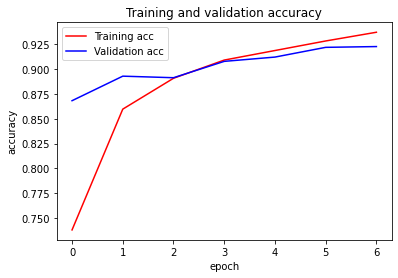

<Figure size 432x288 with 0 Axes>

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.ylabel('loss')  
# plt.xlabel('epoch')
# plt.legend()
plt.show()

## Model Evaluation on Testing Set

In [ ]:
model.evaluate(test_data, test_labels)

58/58 [==============================] - 1s 9ms/step - loss: 0.2321 - acc: 0.9241


[0.23205307126045227, 0.924119234085083]

## Classification metrics and Confusion Matrix

### Classification Metrics

In [ ]:
animals = ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirrels']
preds = np.round(model.predict(test_data),0) 
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

58/58 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

 butterflies       0.98      0.88      0.93       371
    chickens       0.89      0.89      0.89       203
   elephants       0.89      0.89      0.89       152
      horses       0.98      0.93      0.95       472
     spiders       0.90      0.96      0.93       403
   squirrels       0.92      0.91      0.92       244

   micro avg       0.94      0.92      0.93      1845
   macro avg       0.93      0.91      0.92      1845
weighted avg       0.94      0.92      0.93      1845
 samples avg       0.92      0.92      0.92      1845



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [ ]:
# converting from dataframe to numpy
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
# print(categorical_preds)

In [ ]:
cm= confusion_matrix(categorical_test_labels, categorical_preds)

In [ ]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
plot_confusion_matrix(cm, animals)

Normalized confusion matrix


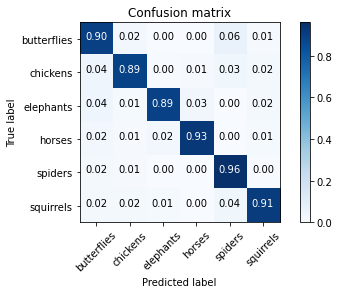

In [ ]:

plot_confusion_matrix(cm, 
                      animals,
                     normalize=True)

## Testing images on model

In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [ ]:
def test_single_image(path):
    image = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(image)  
    preds = model.predict(bt_prediction)
    for idx, animal, x in zip(range(0,6), animals , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = np.argmax(model.predict(bt_prediction), axis=-1)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

In [ ]:
# path = 'data/test/butterears2.jpg'
path = '/content/test images/elephant01.jpeg'
test_single_image(path)

Saving download.jpeg to download.jpeg
User uploaded file "download.jpeg" with length 7231 bytes
[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 18ms/step
ID: 0, Label: butterflies 61.07%
ID: 1, Label: chickens 1.08%
ID: 2, Label: elephants 0.02%
ID: 3, Label: horses 0.78%
ID: 4, Label: spiders 35.33%
ID: 5, Label: squirrels 1.72%
Final Decision:
.
..
...
1/1 [==============================] - 0s 19ms/step
ID: 0, Label: butterflies


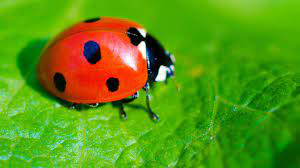

In [ ]:
from google.colab import files

uploaded = files.upload()
# print(list(uploaded.keys()))
bruh = list(uploaded.keys())[0]
print('User uploaded file "{name}" with length {length} bytes'.format(name=bruh, length=len(uploaded[bruh])))
test_single_image(bruh)